In [22]:
import torch 
pixelsplat = torch.load('model_zoo/re10k.ckpt',map_location=torch.device('cuda:0'))

In [17]:
pixelsplat.keys()


dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers'])

In [12]:
print(pixelsplat['optimizer_states'])
pixelsplat['optimizer_states'][0]['param_groups'][0]['lr']=2e-5
pixelsplat['optimizer_states'][0]['param_groups'][0]['initial_lr']=2e-5
# pixelsplat['lr_schedulers'][0]['base_lrs']=2e-5
# pixelsplat['lr_schedulers'][0]['_last_lr']=2e-5
torch.save(pixelsplat,'outputs/waymo_generalized/checkpoints/20000_lr_2e5.ckpt')

[{'state': {0: {'step': tensor(21600., device='cuda:0'), 'exp_avg': tensor([[[[-1.6219e-06, -7.0156e-07, -5.6877e-07,  ..., -7.8617e-07,
           -6.1092e-07, -2.9996e-07],
          [-1.5169e-06, -6.5906e-07, -3.0389e-07,  ..., -7.4410e-07,
           -6.0295e-07, -2.5270e-07],
          [-1.3758e-06, -6.0276e-07, -3.1724e-07,  ..., -6.1518e-07,
           -5.6380e-07, -4.5622e-07],
          ...,
          [-1.1319e-06, -3.2508e-07, -9.6679e-08,  ..., -4.7453e-07,
           -3.8138e-07, -3.3475e-07],
          [-1.1594e-06, -3.4896e-07, -9.8398e-08,  ..., -4.4958e-07,
           -3.6881e-07, -2.8492e-07],
          [-9.3083e-07, -4.2576e-08,  1.4628e-08,  ..., -3.7702e-07,
           -4.9068e-07, -4.5482e-07]],

         [[-1.6237e-06, -6.9442e-07, -5.7383e-07,  ..., -8.1341e-07,
           -6.2309e-07, -3.0863e-07],
          [-1.5505e-06, -6.7586e-07, -3.4443e-07,  ..., -8.1411e-07,
           -6.7882e-07, -3.1570e-07],
          [-1.4165e-06, -6.3015e-07, -3.5377e-07,  ..., -6.

In [23]:
# 获取所有键的列表
keys_to_remove = [key for key in pixelsplat['state_dict'].keys() if 'dino' in key]
# 删除键
for key in keys_to_remove:
    del pixelsplat['state_dict'][key]
    
# 获取所有键的列表
keys_to_remove = [key for key in pixelsplat['state_dict'].keys() if 'global_token_mlp' in key]
# 删除键
for key in keys_to_remove:
    del pixelsplat['state_dict'][key]
    
# 获取所有键的列表
keys_to_remove = [key for key in pixelsplat['state_dict'].keys() if 'local_token_mlp' in key]
# 删除键
for key in keys_to_remove:
    del pixelsplat['state_dict'][key]

In [6]:

new_model = {}
new_model['state_dict'] = pixelsplat['state_dict']
new_model['pytorch-lightning_version'] = pixelsplat['pytorch-lightning_version']
torch.save(pixelsplat,'model_zoo/re10k_resnet.ckpt')


In [24]:

new_model = torch.load('outputs/2024-03-03/16-21-48/checkpoints/epoch=0-step=1.ckpt')
new_model['state_dict']=pixelsplat['state_dict']
torch.save(new_model,'model_zoo/re10k_resnet.ckpt')


In [5]:
import torch

dbarf = torch.load('./model_zoo/dbarf_model_200000.pth',map_location=torch.device('cuda:0'))
pixelsplat = torch.load('outputs/waymo_generalized/checkpoints/20000_dgassians.ckpt',map_location=torch.device('cuda:0'))
print(dbarf.keys())
new_model = {}
new_model['pose_learner'] = dbarf['pose_learner']
new_model['gaussian'] = pixelsplat['state_dict']
torch.save(new_model,'outputs/waymo_generalized/checkpoints/20000_dgassians.ckpt')

dict_keys(['optimizer', 'scheduler', 'pose_optimizer', 'pose_scheduler', 'net_coarse', 'feature_net', 'pose_learner'])


In [1]:
import numpy as np
depths = np.load("outputs/depth_room.npy")
depths = np.reshape(depths,(1,2,176,240,3))[0]

In [8]:
import torch
single_depth1 = torch.from_numpy(depths[0,:,:,0])
single_depth2 = torch.from_numpy(depths[0,:,:,1])
single_depth3 = torch.from_numpy(depths[0,:,:,2])
single_depth4 = torch.from_numpy(depths[1,:,:,0])
single_depth5 = torch.from_numpy(depths[1,:,:,1])
single_depth6 = torch.from_numpy(depths[1,:,:,2])


In [11]:
from utils_loc import img_HWC2CHW, colorize
depth_img1 = img_HWC2CHW(colorize(single_depth1, cmap_name='jet', append_cbar=True)).permute(1,2,0)
depth_img2 = img_HWC2CHW(colorize(single_depth2, cmap_name='jet', append_cbar=True)).permute(1,2,0)
depth_img3 = img_HWC2CHW(colorize(single_depth3, cmap_name='jet', append_cbar=True)).permute(1,2,0)
depth_img4 = img_HWC2CHW(colorize(single_depth4, cmap_name='jet', append_cbar=True)).permute(1,2,0)
depth_img5 = img_HWC2CHW(colorize(single_depth5, cmap_name='jet', append_cbar=True)).permute(1,2,0)
depth_img6 = img_HWC2CHW(colorize(single_depth6, cmap_name='jet', append_cbar=True)).permute(1,2,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


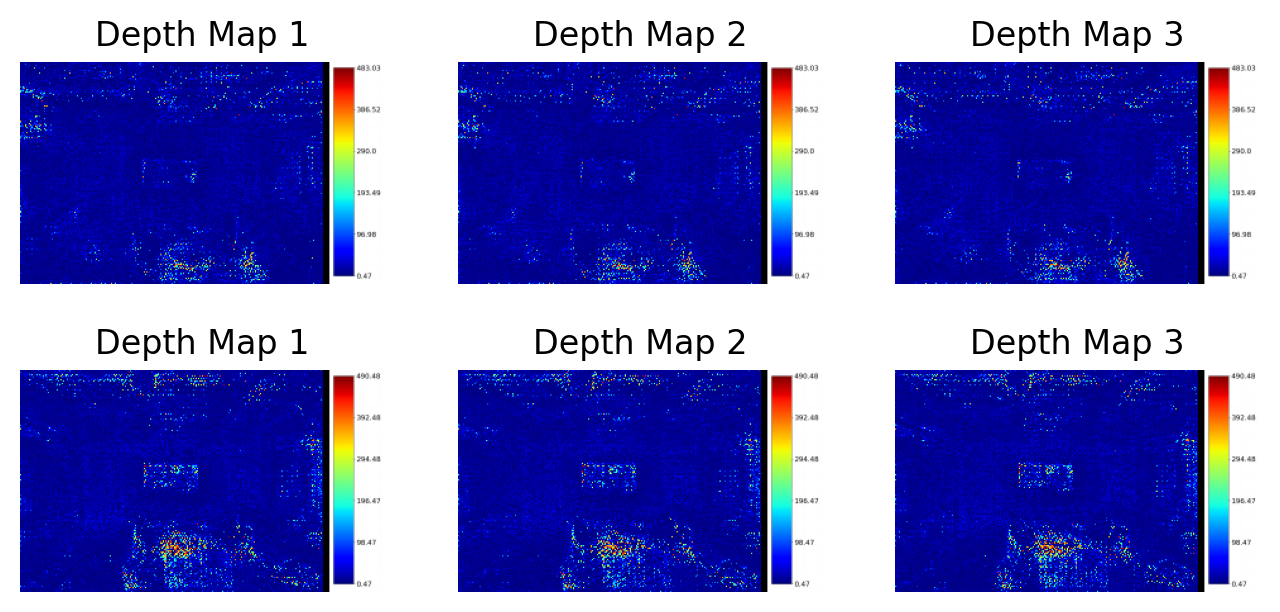

In [26]:
import matplotlib.pyplot as plt

# 创建一个6x1的子图布局
fig, axes = plt.subplots(2, 3, figsize=(8, 12), dpi=200)

# 遍历深度图数据并绘制子图
axes[0,0].imshow(depth_img1, cmap='jet');axes[0,0].set_title(f'Depth Map {1}');axes[0,0].axis('off')
axes[0,1].imshow(depth_img2, cmap='jet');axes[0,1].set_title(f'Depth Map {2}');axes[0,1].axis('off')
axes[0,2].imshow(depth_img3, cmap='jet');axes[0,2].set_title(f'Depth Map {3}');axes[0,2].axis('off')
axes[1,0].imshow(depth_img4, cmap='jet');axes[1,0].set_title(f'Depth Map {1}');axes[1,0].axis('off')
axes[1,1].imshow(depth_img5, cmap='jet');axes[1,1].set_title(f'Depth Map {2}');axes[1,1].axis('off')
axes[1,2].imshow(depth_img6, cmap='jet');axes[1,2].set_title(f'Depth Map {3}');axes[1,2].axis('off')

# 调整子图之间的间距
plt.subplots_adjust(hspace=-0.8)

# 显示图形
plt.show()

In [3]:

from plyfile import PlyData
model = PlyData.read("outputs/gaussians/room/000000.ply")
data = model.elements[0].data

In [4]:
data

memmap([(-0.36764598, 0.9207978 ,  0.30165556, 0., 0., 0.,  0.6270368 ,  0.27709085, -0.01055887, 0.1798552 , -4.385283 , -4.565297 , -4.3835206, 0.3913102 , 0.8808593 , 0.07523756, 0.25554362),
        ( 1.2646818 , 0.5817351 ,  0.9728061 , 0., 0., 0.,  0.34940594, -0.04092865, -0.4219312 , 0.30408466, -3.1666718, -3.2615626, -3.1666553, 0.45252723, 0.8269296 , 0.27358443, 0.19120155),
        ( 3.063443  , 0.19328077,  1.717381  , 0., 0., 0.,  0.6372228 ,  0.32269806, -0.04011466, 0.3330651 , -2.5911973, -2.5911984, -2.5911975, 0.36772412, 0.8034065 , 0.45749587, 0.10007269),
        ...,
        (-0.8731255 , 0.03519807, -0.33677107, 0., 0., 0., -1.0658541 , -1.1217717 , -1.3160621 , 0.12679432, -4.035254 , -5.0948186, -4.191423 , 0.39454415, 0.40995216, 0.5896776 , 0.5731967 ),
        (-0.9398752 , 0.31263223, -0.21230383, 0., 0., 0., -0.8556837 , -1.0373422 , -1.239409  , 0.20383279, -4.36819  , -4.7224474, -4.504862 , 0.60312986, 0.7107681 , 0.27412325, 0.23643066),
        (-0.